c:\Users\Mark\anaconda3\envs\ModifiedCALenv\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


loading images from folder ./accuracy_testing/128x128/VTB/


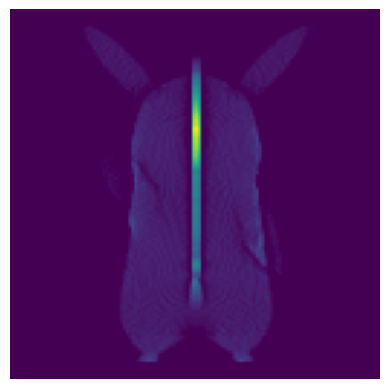

showing first loaded image
loading images from folder ./accuracy_testing/128x128/ML/


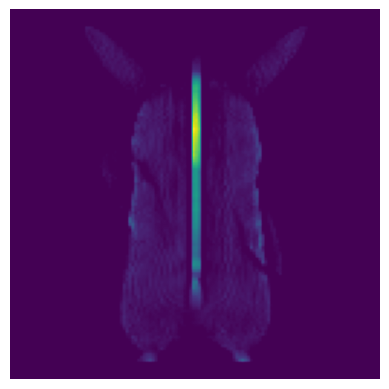

showing first loaded image
loading images from folder ./accuracy_testing/128x128/preProjections/


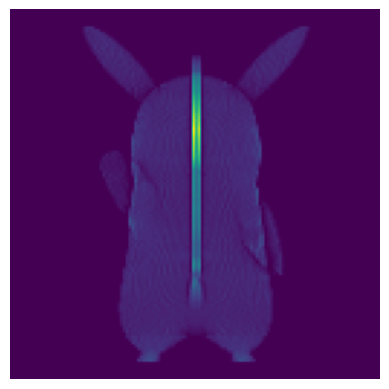

showing first loaded image


In [26]:
import numpy as np

import deepcallib

ground_truth = np.load("ground_truth.npy")
reconstruction_ML = np.load("reconstruction_ML.npy")
reconstruction_VTB = np.load("reconstruction_VTB.npy")
reconstruction_NO_opt = np.load("reconstruction_NO_opt.npy")


projections_VTB = deepcallib.load_png_to_numpy_array("./accuracy_testing/128x128/VTB/", rotate=True)

projections_ML = deepcallib.load_png_to_numpy_array('./accuracy_testing/128x128/ML/', rotate=True)

projections_NO_opt = deepcallib.load_png_to_numpy_array('./accuracy_testing/128x128/preProjections/', rotate=True)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


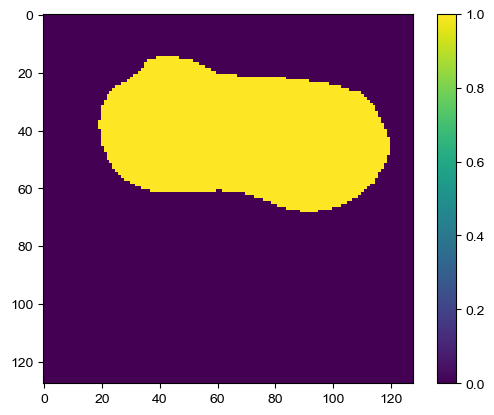

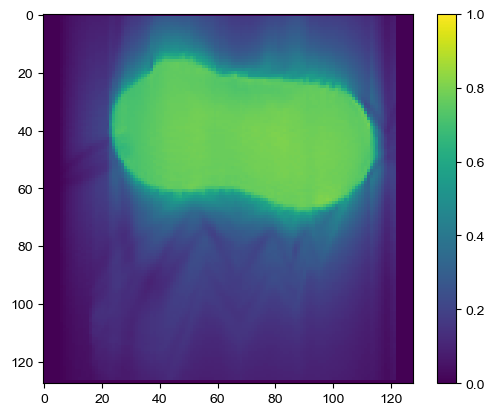

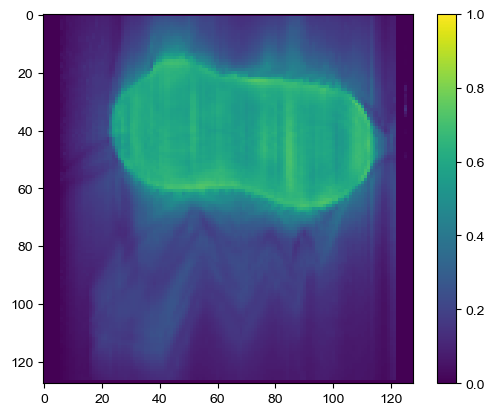

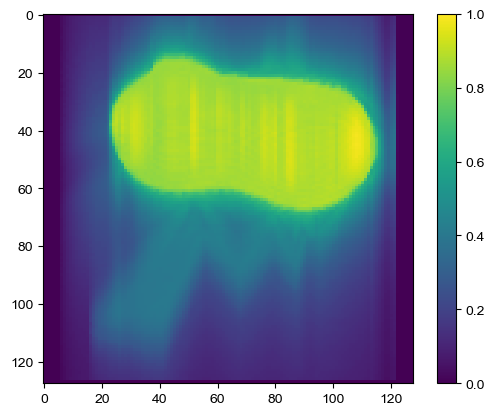

In [27]:


import matplotlib.pyplot as plt
print(ground_truth[100])

# Plot the 2D array as a surface
plt.imshow(ground_truth[70], cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar()
# Show the plot
plt.show()

# Plot the 2D array as a surface
plt.imshow(reconstruction_VTB[70], cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar()
# Show the plot
plt.show()

# Plot the 2D array as a surface
plt.imshow(reconstruction_ML[70], cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar()
# Show the plot
plt.show()

# Plot the 2D array as a surface
plt.imshow(reconstruction_NO_opt[70], cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar()
# Show the plot
plt.show()




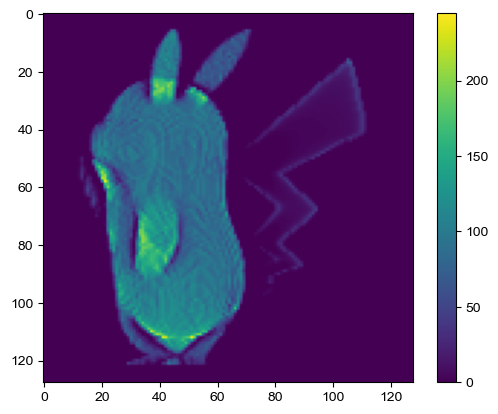

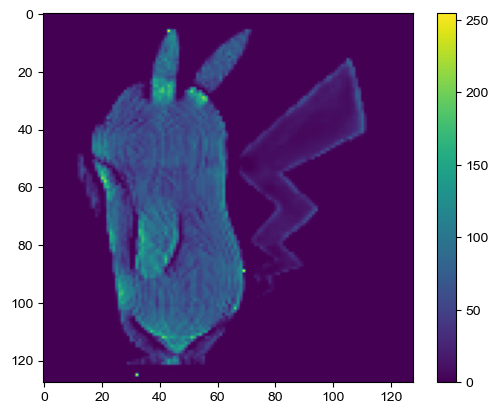

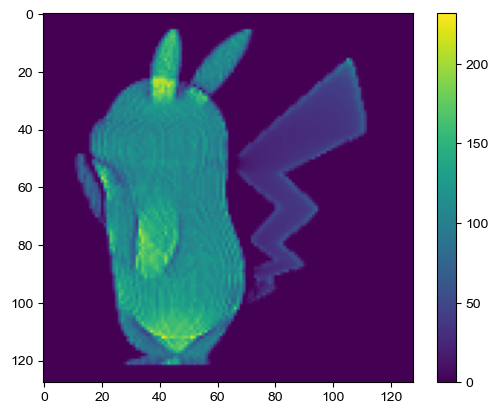

In [33]:

# Plot the 2D array as a surface
plt.imshow(projections_VTB[70])
plt.colorbar()
# Show the plot
plt.show()

# Plot the 2D array as a surface
plt.imshow(projections_ML[70])
plt.colorbar()
# Show the plot
plt.show()

# Plot the 2D array as a surface
plt.imshow(projections_NO_opt[70])
plt.colorbar()
# Show the plot
plt.show()




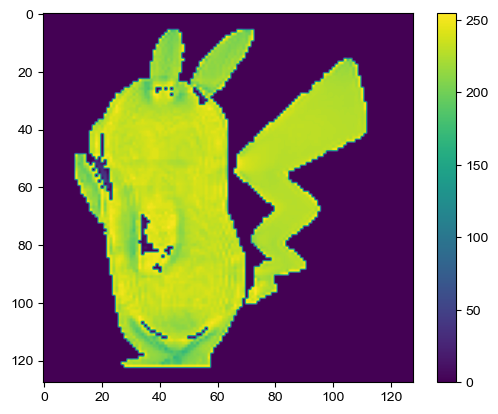

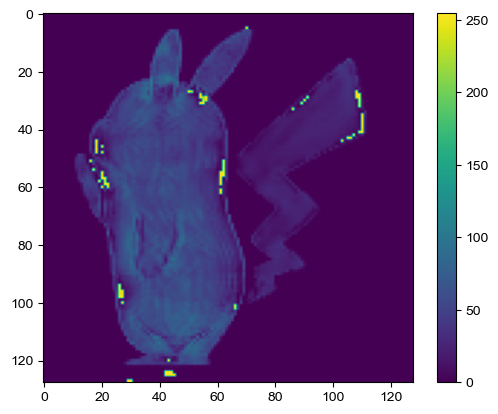

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 206 221 246 226 234 252 242 240 231 220 216 218 207 201 211 234   5 254
 252 244 245 243 246 239 242 242 251 249 231 216 218 228 231 233 237 231
 235 233 228 237 235 236 231 231 235 248 219   0   0   0   0   0   0   0
   0   0   0   0   0   0 243 229 234 229 228 227 227 227 227 227 227 228
 229 232 226 239 255   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [36]:

# Plot the 2D array as a surface
plt.imshow(projections_VTB[70] - projections_NO_opt[70])
plt.colorbar()
# Show the plot
plt.show()

# Plot the 2D array as a surface
plt.imshow(projections_NO_opt[70] - projections_ML[70])
plt.colorbar()
# Show the plot
plt.show()

print((projections_VTB[70] - projections_NO_opt[70])[70])


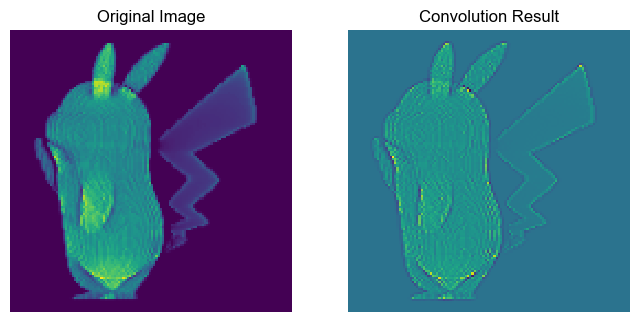

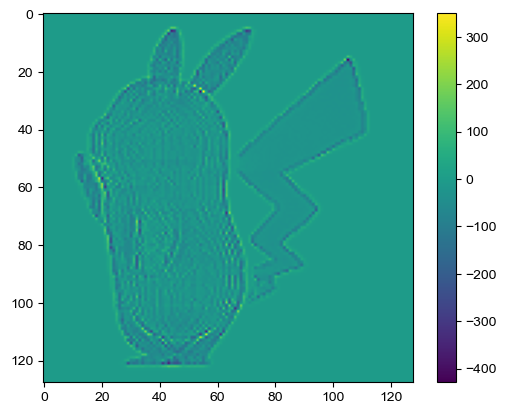

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 -98
 239  42 -41 -41 282  41 138 130 118  85 134  41 170  62   1 161 165 203
  50 170  96 197 108 104 152  71 141 204  76  40 118 118  82  92 123 138
  56 116 128  58 161 125 126  67  97 278  61 -60   0   0   0   0   0   0
   0   0   0   0  -1 -39   4 128  33  29  30  33  34  38  34  36  36  37
  31  39 180 -13 -40  -1   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [45]:
from scipy.signal import convolve2d
# Define a Laplacian sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Perform 2D convolution
result = convolve2d(projections_NO_opt[70], sharpening_kernel, mode='same', boundary='symm', fillvalue=0)

# Display the original image and the result
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(projections_NO_opt[70], interpolation='nearest')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Convolution Result')
plt.imshow(result, interpolation='nearest')
plt.axis('off')

plt.show()


# Plot the 2D array as a surface
plt.imshow(projections_VTB[70] - result)
plt.colorbar()
# Show the plot
plt.show()

print(result[70])